<a href="https://colab.research.google.com/github/rajveersingh11/python-journey/blob/main/women_entrepreneurship_data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Standard **Import**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
sns.set_style('darkgrid')

In [ ]:
import plotly.express as px

Ignoring Harmless warning

In [ ]:
import warnings
warnings.filterwarnings('ignore')

Loading Data

In [ ]:
data = pd.read_csv('/content/Dataset3.csv')

In [ ]:
data.head()

,No;Country;Level of development;European Union Membership;Currency;Women Entrepreneurship Index;Entrepreneurship Index;Inflation rate;Female Labor Force Participation Rate
0,4;Austria;Developed;Member;Euro;54.9;64.9;0.9;...
1,6;Belgium;Developed;Member;Euro;63.6;65.5;0.6;58
2,17;Estonia;Developed;Member;Euro;55.4;60.2;-0....
3,18;Finland;Developed;Member;Euro;66.4;65.7;-0....
4,19;France;Developed;Member;Euro;68.8;67.3;0;60.6


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 1 columns):
 #   Column                                                                                                                                                                       Non-Null Count  Dtype 
---  ------                                                                                                                                                                       --------------  ----- 
 0   No;Country;Level of development;European Union Membership;Currency;Women Entrepreneurship Index;Entrepreneurship Index;Inflation rate;Female Labor Force Participation Rate  51 non-null     object
dtypes: object(1)
memory usage: 540.0+ bytes


In [ ]:
data = pd.read_csv('/content/Dataset3.csv', sep=';')
data.head()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 9 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   No                                     51 non-null     int64  
 1   Country                                51 non-null     object 
 2   Level of development                   51 non-null     object 
 3   European Union Membership              51 non-null     object 
 4   Currency                               51 non-null     object 
 5   Women Entrepreneurship Index           51 non-null     float64
 6   Entrepreneurship Index                 51 non-null     float64
 7   Inflation rate                         51 non-null     float64
 8   Female Labor Force Participation Rate  51 non-null     float64
dtypes: float64(4), int64(1), object(4)
memory usage: 3.7+ KB


In [ ]:
data.head()

,No,Country,Level of development,European Union Membership,Currency,Women Entrepreneurship Index,Entrepreneurship Index,Inflation rate,Female Labor Force Participation Rate
0,4,Austria,Developed,Member,Euro,54.9,64.9,0.90,67.1
1,6,Belgium,Developed,Member,Euro,63.6,65.5,0.60,58.0
2,17,Estonia,Developed,Member,Euro,55.4,60.2,-0.88,68.5
3,18,Finland,Developed,Member,Euro,66.4,65.7,-0.20,67.7
4,19,France,Developed,Member,Euro,68.8,67.3,0.00,60.6


In [ ]:
data['Level of development'].value_counts()

,count
Level of development,
Developed,27
Developing,24


In [ ]:
data['European Union Membership'].value_counts()

,count
European Union Membership,
Not Member,31
Member,20


In [ ]:
data['Currency'].value_counts()

,count
Currency,
National Currency,36
Euro,15


Importing Country Code

plotly requires country's alpha 3 codes for locating data in the world map. So we have to manually import from Github

In [ ]:
import requests
import io

In [ ]:
url = "https://raw.githubusercontent.com/lukes/ISO-3166-Countries-with-Regional-Codes/master/all/all.csv"

In [ ]:
s= requests.get(url).content
codes = pd.read_csv(io.StringIO(s.decode('utf-8')))

In [ ]:
codes = codes[['name','alpha-3']]
codes.columns = ['Country','Code']
codes.head()

,Country,Code
0,Afghanistan,AFG
1,Åland Islands,ALA
2,Albania,ALB
3,Algeria,DZA
4,American Samoa,ASM


In [ ]:
data = pd.merge(data, codes, on='Country')
data.head()

,No,Country,Level of development,European Union Membership,Currency,Women Entrepreneurship Index,Entrepreneurship Index,Inflation rate,Female Labor Force Participation Rate,Code
0,4,Austria,Developed,Member,Euro,54.9,64.9,0.90,67.1,AUT
1,6,Belgium,Developed,Member,Euro,63.6,65.5,0.60,58.0,BEL
2,17,Estonia,Developed,Member,Euro,55.4,60.2,-0.88,68.5,EST
3,18,Finland,Developed,Member,Euro,66.4,65.7,-0.20,67.7,FIN
4,19,France,Developed,Member,Euro,68.8,67.3,0.00,60.6,FRA


In [ ]:
data = data.drop('No', axis= 1)

**Exploratory** **Data** **Analysis**

In [ ]:
data.describe()

,Women Entrepreneurship Index,Entrepreneurship Index,Inflation rate,Female Labor Force Participation Rate
count,45.000000,45.000000,45.000000,45.000000
mean,48.246667,47.162222,2.244000,58.230444
std,14.369073,16.161940,5.290825,13.749181
min,25.300000,24.800000,-2.250000,13.000000
25%,36.600000,32.100000,-0.500000,55.900000
50%,49.900000,42.700000,0.500000,60.800000
75%,59.800000,65.300000,2.300000,66.800000
max,74.800000,77.600000,26.500000,82.300000


Correlation Heatmap

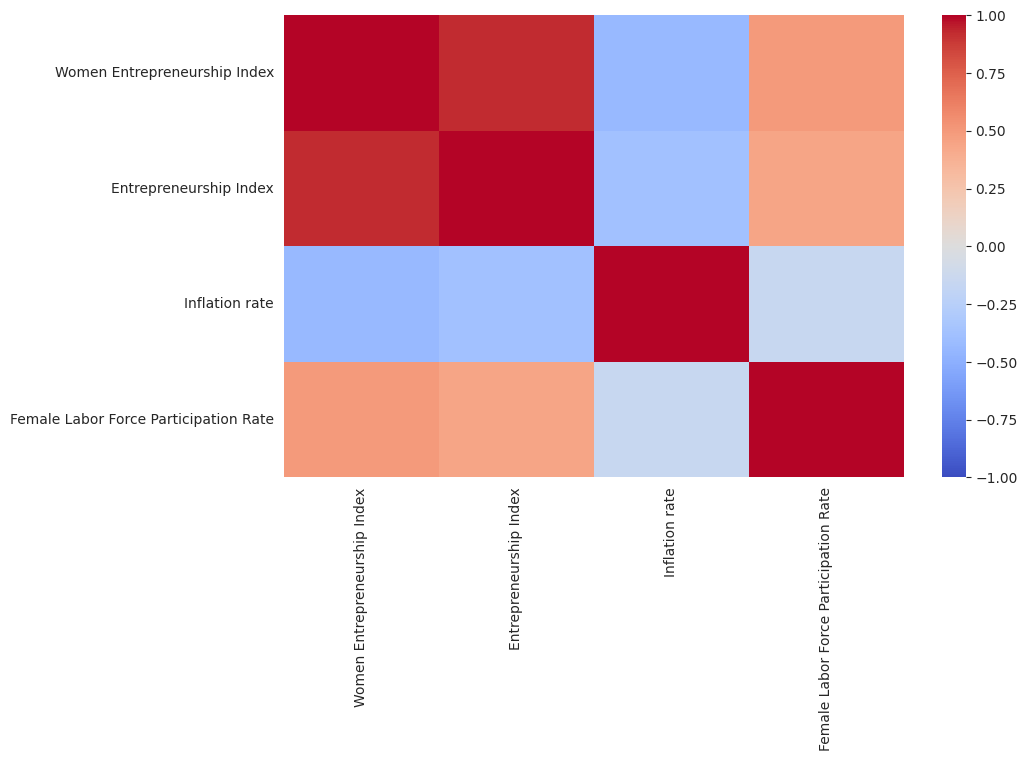

In [ ]:
plt.figure(figsize=(10,6))
sns.heatmap(data.select_dtypes(include=np.number).corr(),vmax = 1, vmin = -1, cmap = 'coolwarm');

Women Entrepreneurship indices in the World

In [ ]:
fig = px.choropleth(data, locations='Code',color = 'Women Entrepreneurship Index',
                    hover_name='Country',
                    hover_data = ['Level of development','Entrepreneurship Index',
                                  'Women Entrepreneurship Index','Inflation rate',
                                  'Female Labor Force Participation Rate'],
                    color_continuous_scale=px.colors.sequential.Plasma)
fig.show()

Effect of Inflation on Entrepreneurship

In [ ]:
px.scatter(data, x = 'Inflation rate', y= 'Entrepreneurship Index')

In [ ]:
#With a decrease in Inflation Entrepreneurship Index increases

Woman Entrepreneurship Index v/s Entrepreneurship index

In [ ]:
px.scatter(data, x = 'Women Entrepreneurship Index', y= 'Entrepreneurship Index')

In [ ]:
#As Entrepreneurship Index increases
#Women Entrepreneurship Index tend to increase

Woman Entrepreneurship Index v/s Female Labor Force Participation Rate

In [ ]:
px.scatter(data, x = 'Women Entrepreneurship Index',
           y= 'Female Labor Force Participation Rate')